# Importing dataset

In [2]:
import pandas as pd
data = pd.read_csv(filepath_or_buffer="hr_data.csv", sep=";")
data.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales


In [3]:
# Removing irrelevant columns
data.drop(columns=['id'], inplace=True)

# Exploratory Data Analysis

In [4]:
data.shape

(14999, 10)

We have **14,999** lines and **10** columns in the dataset.

## Is there null values?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   satisfaction_level     14999 non-null  object
 1   last_evaluation        14999 non-null  object
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   salary                 14999 non-null  object
 8   num_project            14999 non-null  int64 
 9   depto                  14999 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.1+ MB


In [6]:
print(data.isnull().sum())

satisfaction_level       0
last_evaluation          0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
num_project              0
depto                    0
dtype: int64


Observations:
- There are no null values along the dataset
- `satisfaction_level` and `last_evaluation` should have **float** values, but they are currently **strings**
    - These columns need to be converted to float type before any analysis.

## Fixing `satisfaction_level` and `last_evaluation` values

In [7]:
columns_float = ['satisfaction_level', 'last_evaluation']

for col in columns_float:
    data[col] = data[col].apply(lambda x: float(x.replace(',', '.')))

print(data.head())
print(data.info())

   satisfaction_level  last_evaluation  average_montly_hours  \
0                0.38             0.53                   157   
1                0.80             0.86                   262   
2                0.11             0.88                   272   
3                0.72             0.87                   223   
4                0.37             0.52                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0     low   
1                   6              0     1                      0  medium   
2                   4              0     1                      0  medium   
3                   5              0     1                      0     low   
4                   3              0     1                      0     low   

   num_project  depto  
0            2  sales  
1            5  sales  
2            6  sales  
3            5  sales  
4            2  sales  
<class '

In [8]:
data.describe()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,num_project
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612823,0.716102,201.083672,3.407027,0.144610,0.238083,0.021268,3.785986
std,0.248655,0.171169,50.182121,1.176120,0.351719,0.425924,0.144281,1.194539
min,0.010000,0.360000,96.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,0.440000,0.560000,156.000000,3.000000,0.000000,0.000000,0.000000,3.000000
50%,0.640000,0.720000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000
75%,0.820000,0.870000,245.000000,4.000000,0.000000,0.000000,0.000000,5.000000
max,1.000000,1.000000,810.000000,6.000000,1.000000,1.000000,1.000000,6.000000


In [9]:
columns_bool = []

for col in data.columns:
    unique_values = set(data[col])
    print(f"{col}: {list(unique_values)[:12]}")

    if unique_values == {0, 1}:
        columns_bool.append(col)

columns_cat = ['salary', 'depto']
columns_num = [col for col in data.columns if col not in columns_bool + columns_cat]
print(f"\nBoolean: {columns_bool}")
print(f"Categoric: {columns_cat}")
print(f"Numeric: {columns_num}")

satisfaction_level: [0.8, 0.72, 0.75, 0.25, 0.76, 0.51, 0.5, 0.27, 0.77, 0.78, 1.0, 0.21]
last_evaluation: [0.53, 0.86, 0.88, 0.52, 0.87, 0.5, 0.77, 0.85, 1.0, 0.54, 0.92, 0.59]
average_montly_hours: [96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]
time_spend_company: [2, 3, 4, 5, 6]
Work_accident: [0, 1]
left: [0, 1]
promotion_last_5years: [0, 1]
salary: ['low', 'medium', 'high']
num_project: [2, 3, 4, 5, 6]
depto: ['sales', 'management', 'IT', 'support', 'marketing', 'hr', 'RandD', 'product_mng', 'technical', 'accounting']

Boolean: ['Work_accident', 'left', 'promotion_last_5years']
Categoric: ['salary', 'depto']
Numeric: ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'num_project']


## Analyzing boolean columns

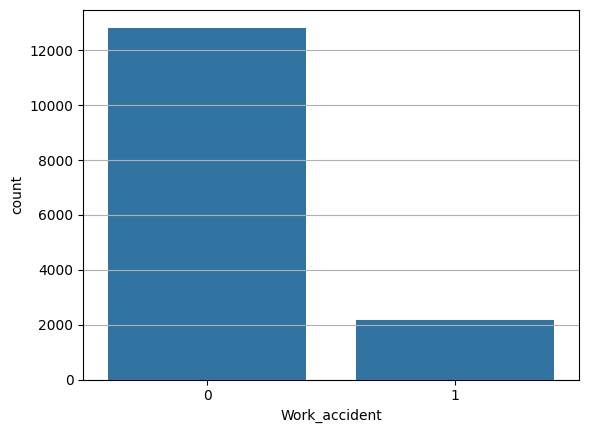

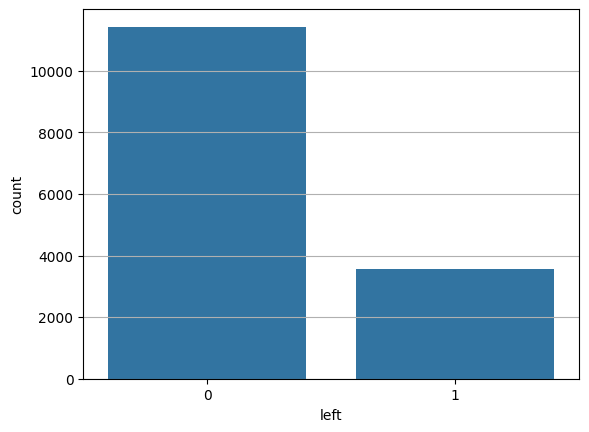

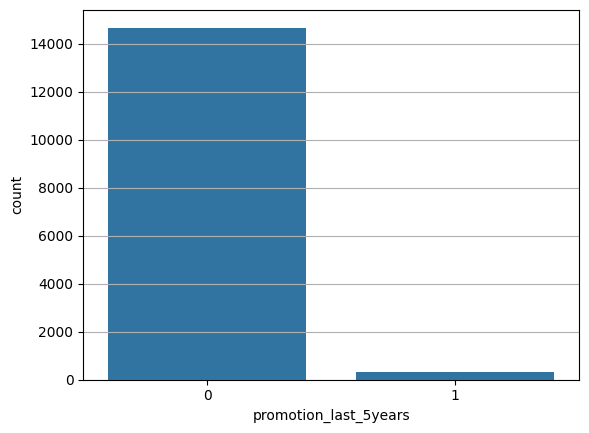

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in data[columns_bool].columns:
    sns.countplot(data=data, x=col)
    plt.grid(visible=True, axis='y')
    plt.show()

The boolean columns are very unbalanced. We have very few True values compared to False values. This suggests we need to be careful when choosing the model, as standard algorithms may not perform well on such imbalanced data.

## Analyzing categoric columns

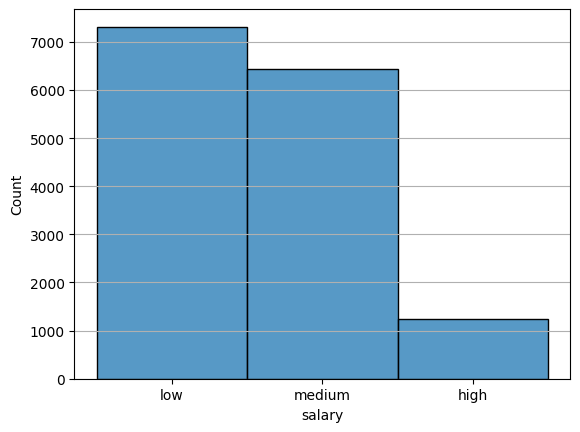

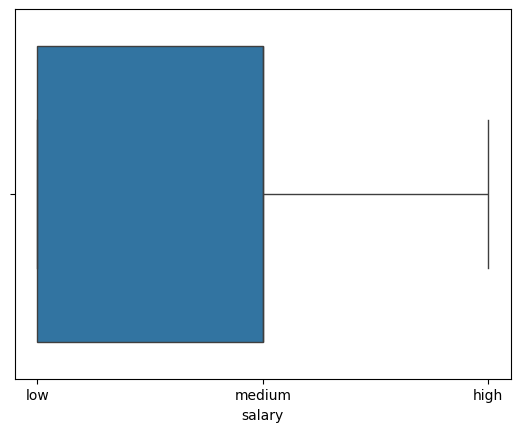

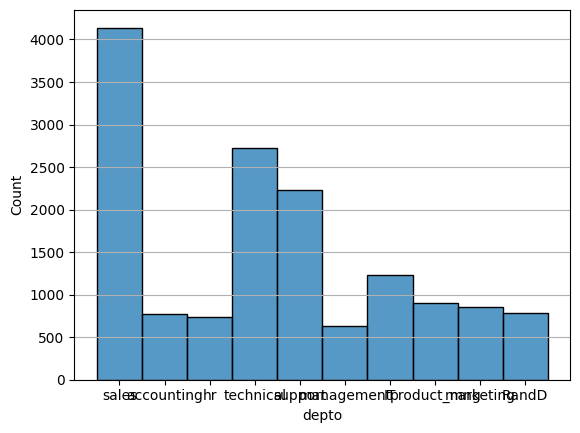

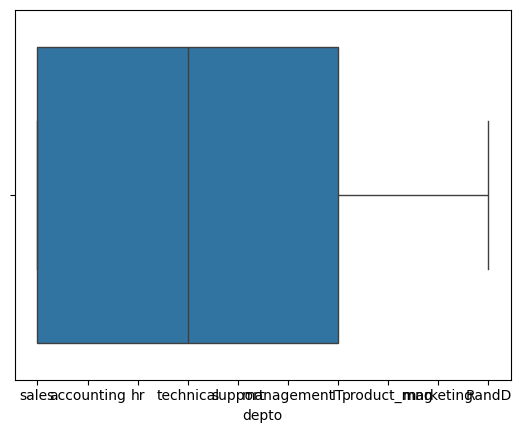

In [11]:
for col in data[columns_cat].columns:
    sns.histplot(data=data, x=col)
    plt.grid(visible=True, axis='y')
    plt.show()

    sns.boxplot(data=data, x=col)
    plt.show()

## Analyzing numeric columns

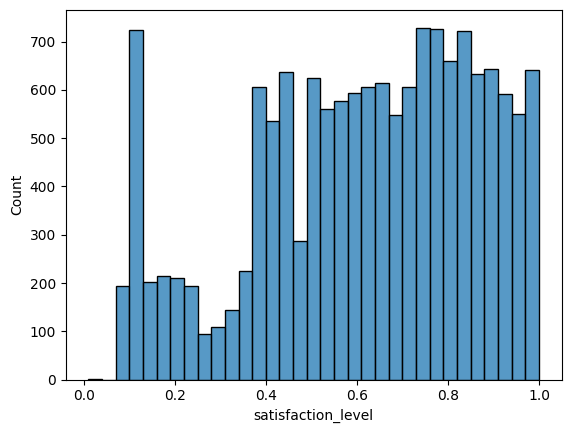

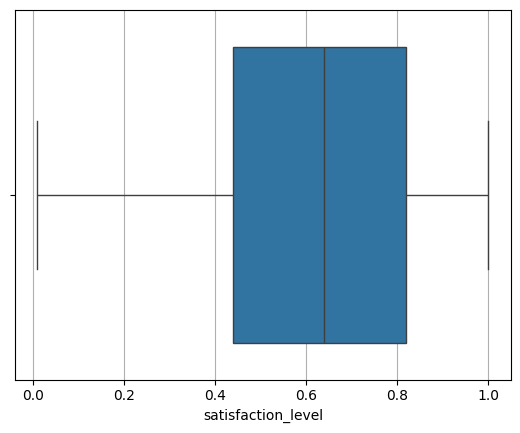

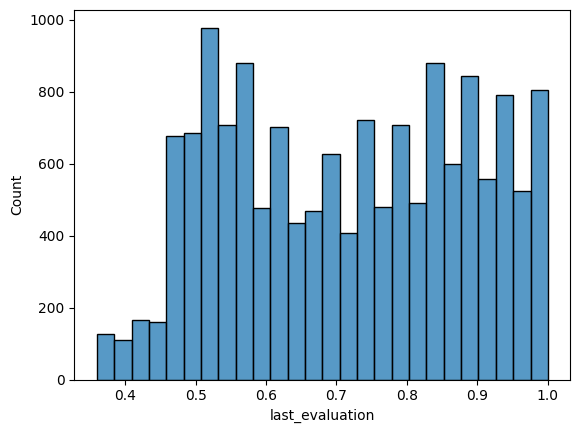

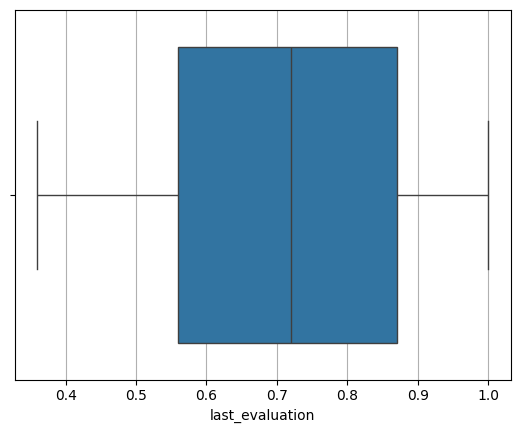

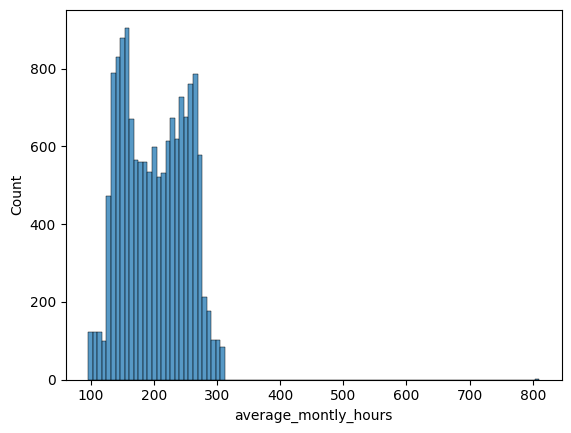

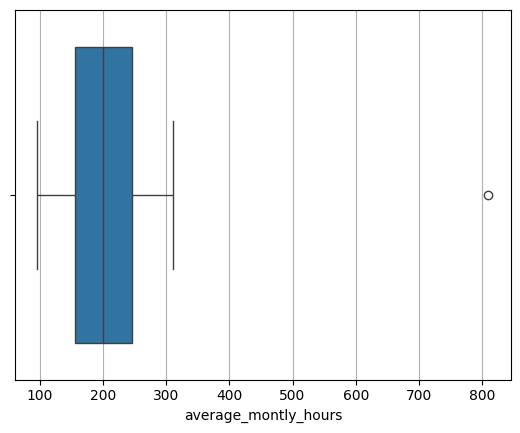

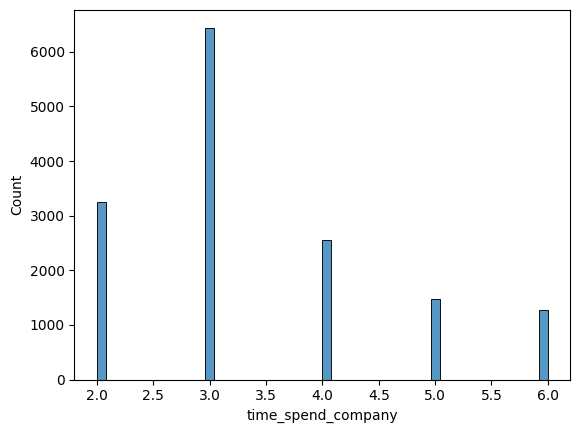

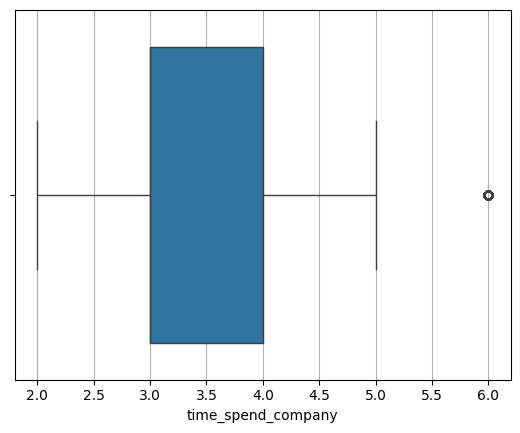

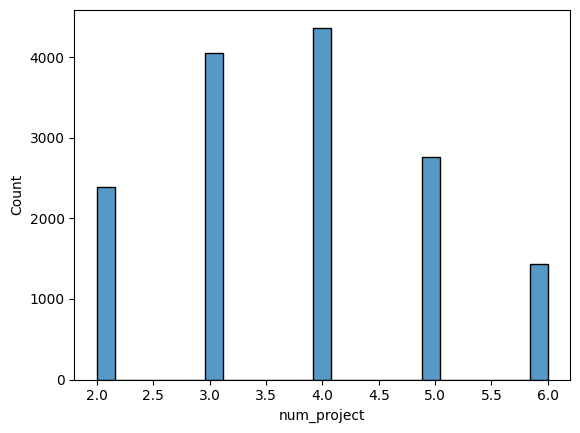

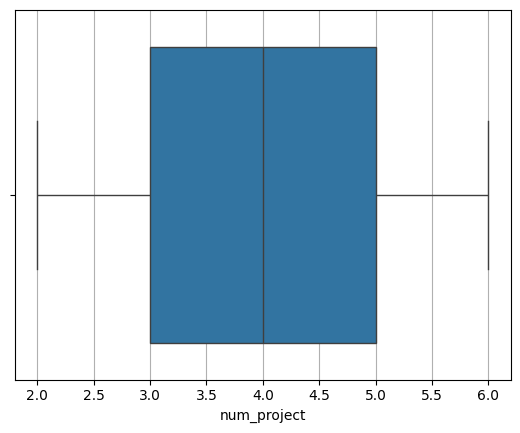

In [13]:
for col in data[columns_num].columns:
    sns.histplot(data=data, x=col)
    plt.show()

    sns.boxplot(data=data, x=col)
    plt.grid(visible=True, axis='x')
    plt.show()

Observations:
- There's an outlier value at `average_montly_hours`
- There are some possible outlier values at `time_spend_company`

### Checking outliers in numerical columns

#### `average_montly_hours`

In [ ]:
# Showing the 5 rows with biggest value in `average_montly_hours`
data.nlargest(5, 'average_montly_hours')

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
14972,0.11,0.97,810,4,0,1,0,medium,6,accounting
566,0.11,0.79,310,4,0,1,0,low,6,hr
803,0.10,0.77,310,4,0,1,0,medium,6,technical
809,0.11,0.97,310,4,0,1,0,medium,6,support
1059,0.70,0.93,310,3,0,1,0,low,2,product_mng


That's for sure an outlier, since it's humanly impossible to have 810 average monthly hours of work. This employee would have to work for 27 hours a day every single day, or work 24/7 for almost 34 days.

#### `time_spend_company`

In [21]:
data.loc[data['time_spend_company'] == 6]

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
1,0.80,0.86,262,6,0,1,0,medium,5,sales
17,0.78,0.99,255,6,0,1,0,low,4,sales
34,0.84,0.87,246,6,0,1,0,low,4,hr
47,0.57,0.70,273,6,0,1,0,low,3,support
67,0.90,0.98,264,6,0,1,0,medium,4,product_mng
...,...,...,...,...,...,...,...,...,...,...
14942,0.20,0.50,135,6,0,1,0,low,5,RandD
14947,0.91,0.98,242,6,0,1,0,low,4,support
14977,0.81,0.85,251,6,0,1,0,medium,4,hr
14986,0.85,0.85,247,6,0,1,0,low,4,technical


There are **1282** employees with 6 years of company time. This is a significant amount, so they are not outliers.